#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from functools import reduce
import scipy.stats as st

#### Importing required dataset

In [2]:
city_master = pd.read_csv('City_Master.csv')
cust_and_bank_det = pd.read_csv('Customer_and_bank details_p1.csv')
cust_camp_det = pd.read_csv('Customer_campaign_details_p1.csv')
cust_post_code_det = pd.read_csv('Customer_Postal_Code_details.csv')
cust_resp_data = pd.read_csv('Customer_Response_data_p1.csv')
cust_social_eco_data = pd.read_csv('Customer_social_economic_data_p1.csv')
reg_code_master = pd.read_csv('Region_code_master.csv')
state_master = pd.read_csv('State_Master.csv')

# TASK 1.1: Analysis of Percentage Turnout of Marketing Campaign

#### 1.Joining customer response data with customer campaign data and getting insights and drawing conclusion on percentage turnout

In [3]:
df1 = pd.merge(cust_resp_data, cust_camp_det, on='Customer_id', how='outer')

Display the joined dataset

In [4]:
display(df1)

,Customer_id,y,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,no,telephone,may,mon,307,1,999,0,nonexistent
1,2,no,telephone,may,mon,198,1,999,0,nonexistent
2,3,no,telephone,may,mon,139,1,999,0,nonexistent
3,4,no,telephone,may,mon,217,1,999,0,nonexistent
4,5,no,telephone,may,mon,380,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...
37079,37080,yes,cellular,nov,fri,334,1,999,0,nonexistent
37080,37081,no,cellular,nov,fri,383,1,999,0,nonexistent
37081,37082,no,cellular,nov,fri,189,2,999,0,nonexistent
37082,37083,yes,cellular,nov,fri,442,1,999,0,nonexistent


Find out the response distribution for the campaign

In [5]:
response = df1['y'].value_counts()
display(response)

no     32876
yes     4208
Name: y, dtype: int64

INFERENCE: It is found that 11.3% out of the total people who were targeted through the campaign responded 'Yes'

#### 2. Right mode to Contact the Customers (Telephone or Cellular)

Analysing the mode of contacting the customers [cellular vs telephone]

In [113]:
resp_contact = df1['contact'].value_counts()

In [114]:
print(resp_contact)

cellular     23522
telephone    13562
Name: contact, dtype: int64


Filtering the customers who were contacted via telephone and responded 'yes'

In [115]:
tel_yes = df1[["contact", "y"]].loc[(df1["contact"] == "telephone") & (df1["y"]=="yes")]

Filtering the customers who were contacted via telephone and responded 'No'

In [116]:
tel_no = df1[["contact", "y"]].loc[(df1["contact"] == "telephone") & (df1["y"]=="no")]

Filtering the customers who were contacted via telephone

In [117]:
tel =  df1[["contact", "y"]].loc[(df1["contact"] == "telephone")]
tel
tel.value_counts()

contact    y  
telephone  no     12846
           yes      716
dtype: int64

Filtering the customers who were contacted via cellular and responded 'yes'

In [120]:
cellular =  df1[["contact", "y"]].loc[(df1["contact"] == "cellular")]

In [122]:
df_telephone = df1.groupby(['contact', 'y'])['Customer_id'].count().unstack()

In [123]:
display(df_telephone)

y,no,yes
contact,,
cellular,20030,3492
telephone,12846,716


INFERENCE: It was found that 14.8% of the people who were contacted via cellular responded 'Yes' in comparison to 5.3% who were contacted via telephone. Hence we can infer that Cellular is a better mode of contact. 

#### 3. Analysis on attempts made to turn a person into successful depositor

In [125]:
success = df1[(df1['y']=="yes") & ((df1['poutcome']=="failure") | (df1['poutcome']=="nonexistent"))]

In [126]:
display(success)

,Customer_id,y,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
68,69,yes,telephone,may,mon,1575,1,999,0,nonexistent
75,76,yes,telephone,may,mon,1042,1,999,0,nonexistent
79,80,yes,telephone,may,mon,1467,1,999,0,nonexistent
120,121,yes,telephone,may,mon,579,1,999,0,nonexistent
258,259,yes,telephone,may,mon,935,3,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...
37070,37071,yes,cellular,nov,thu,353,1,999,0,nonexistent
37071,37072,yes,cellular,nov,thu,329,1,999,2,failure
37078,37079,yes,cellular,nov,fri,281,1,999,0,nonexistent
37079,37080,yes,cellular,nov,fri,334,1,999,0,nonexistent


Count of all rows in poutcome

In [127]:
display(success.Customer_id.count())

3393

INFERENCE: 3393 people who had given a negative reponse or had not participated in the previous campaign turned into successful depositors in this campaign.

In [128]:
succ1 = success.groupby(['campaign'])['Customer_id'].count()
succ1

campaign
1     1646
2      853
3      429
4      212
5      101
6       59
7       31
8       14
9       13
10      10
11      11
12       3
13       3
14       1
15       2
17       4
23       1
Name: Customer_id, dtype: int64

INFERENCE: 3393 people who responded 'Yes' for the current campaign but 'No' for the previous one. Out of these, 1646 people got converted in the 1st attempt, and 853 people in the 2nd attempt. Looking at the trend it can be inferred that people who agree to deposit generally agree in 1st few attempts.

Analysis based on 'campaign' - number of contacts performed during this campaign and for this client (includes last contact)

In [133]:
att_camp = df1.groupby(['campaign', 'y'])['Customer_id'].count().unstack()
att_camp

y,no,yes
campaign,,
1,13793.0,2090.0
2,8438.0,1094.0
3,4262.0,515.0
4,2154.0,235.0
5,1331.0,110.0
6,804.0,69.0
7,547.0,33.0
8,346.0,14.0
9,247.0,13.0


INFERENCE: 13793 people responded "Yes" to the campaign within the first attempt of contacting them, while 2090 people responded with a "No'. The highest success was recorded when people were contacted once. 

#### 4. Personal data analysis on marital status, existing loans, education, profession etc. and its impact on the campaign’s success.

Joining customer response data table with customer and bank details table

In [13]:
df4 = pd.merge(cust_resp_data, cust_and_bank_det, on='Customer_id', how='outer')

Display the joined table

In [14]:
df4

,Customer_id,y,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code
0,1,no,56,services,married,high.school,no,no,yes,3,S1,C1
1,2,no,45,services,married,basic.9y,unknown,no,no,3,S1,C1
2,3,no,59,admin.,married,professional.course,no,no,no,4,S2,C2
3,4,no,41,blue-collar,married,unknown,unknown,no,no,3,S3,C3
4,5,no,24,technician,single,professional.course,no,yes,no,3,S3,C3
...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,yes,73,retired,married,professional.course,no,yes,no,2,S16,C21
37080,37081,no,46,blue-collar,married,professional.course,no,no,no,2,S16,C21
37081,37082,no,56,retired,married,university.degree,no,yes,no,2,S16,C21
37082,37083,yes,44,technician,married,professional.course,no,no,no,4,S17,C49


In [15]:
combine1 = df4[['y','job','education']]
combine1

,y,job,education
0,no,services,high.school
1,no,services,basic.9y
2,no,admin.,professional.course
3,no,blue-collar,unknown
4,no,technician,professional.course
...,...,...,...
37079,yes,retired,professional.course
37080,no,blue-collar,professional.course
37081,no,retired,university.degree
37082,yes,technician,professional.course


Analysis of the Impact of Loan on Response of Candidates

In [140]:
loan_analyse_n =  df4[["loan", "y"]].loc[(df4["loan"] == "no")]
loan_analyse_n

,loan,y
1,no,no
2,no,no
3,no,no
4,no,no
5,no,no
...,...,...
37079,no,yes
37080,no,no
37081,no,no
37082,no,yes


In [141]:
loan_analyse_n.value_counts()

loan  y  
no    no     27062
      yes     3499
dtype: int64

INFERENCE: Out of the candidates who did not have any loans, 3499 responded positively, while 27,062 of them responded with a 'No'.

In [143]:
loan_analyse_y =  df4[["loan", "y"]].loc[(df4["loan"] == "yes")]
loan_analyse_y

,loan,y
0,yes,no
8,yes,no
11,yes,no
13,yes,no
14,yes,no
...,...,...
36999,yes,yes
37010,yes,no
37025,yes,yes
37041,yes,no


In [144]:
loan_analyse_y.value_counts()

loan  y  
yes   no     5023
      yes     618
dtype: int64

INFERENCE: Out of the candidates who did have loans, 618 responded positively, while 5023 of them responded with a 'No'.

Univariate Analysis based on 'loan' variable

In [146]:
analys_loan = df4.groupby(['loan', 'y'])['Customer_id'].count().unstack()
analys_loan

y,no,yes
loan,,
no,27062,3499
unknown,791,91
yes,5023,618


Univariate Analysis based on 'job' variable

In [149]:
analys_job = df4.groupby(['job', 'y'])['Customer_id'].count().unstack()
analys_job

y,no,yes
job,,
admin.,8174,1246
blue-collar,7738,576
entrepreneur,1198,111
housemaid,853,93
management,2345,292
retired,1146,395
self-employed,1145,131
services,3249,298
student,527,240


In [152]:
#Education Analysis
analys_educ = df4.groupby(['education', 'y'])['Customer_id'].count().unstack()

## 5: Socio-Economical Analysis of the Customers

Joining the tables

In [17]:
df5 = pd.merge(cust_resp_data, cust_social_eco_data, on='Customer_id', how='outer')
df5

,Customer_id,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,no,1.1,93.994,-36.4,4.857,5191.0
1,2,no,1.1,93.994,-36.4,4.857,5191.0
2,3,no,1.1,93.994,-36.4,4.857,5191.0
3,4,no,1.1,93.994,-36.4,4.857,5191.0
4,5,no,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...
37079,37080,yes,-1.1,94.767,-50.8,1.028,4963.6
37080,37081,no,-1.1,94.767,-50.8,1.028,4963.6
37081,37082,no,-1.1,94.767,-50.8,1.028,4963.6
37082,37083,yes,-1.1,94.767,-50.8,1.028,4963.6


In [18]:
analys_cpi = df5.groupby(['cons.price.idx', 'y'])['Customer_id'].count().unstack()
analys_cpi

y,no,yes
cons.price.idx,,
92.201,455,237
92.379,142,94
92.431,233,158
92.469,100,63
92.649,166,155
92.713,76,81
92.756,8,1
92.843,141,110
92.893,4742,480


Analysis based on the CPI variable

In [19]:
cpi_sort=df5.groupby(['cons.price.idx', 'y'])['Customer_id'].count().unstack().sort_values("yes", ascending=False)
cpi_sort

y,no,yes
cons.price.idx,,
92.893,4742,480
93.075,1821,405
93.918,5616,369
93.444,4420,244
92.963,392,237
92.201,455,237
93.994,6782,218
94.465,3778,171
93.200,3098,168


INFERENCE: The result indicates that Consumer Price Index value of 93.994 produced the largest number of unsuccessful responses. While, the CPI value of 92.893 produced the largest number of successful responses.

Analysis on the basis of 'emp.var.rate'

In [159]:
analys_se = df5.groupby(['emp.var.rate', 'y'])['Customer_id'].count().unstack()
analys_se

y,no,yes
emp.var.rate,,
-3.4,541,407
-3.0,76,81
-2.9,947,537
-1.8,6958,1337
-1.7,329,367
-1.1,300,268
-0.2,8,1
-0.1,3121,208
1.1,6782,218


In [160]:
emp_sort=df5.groupby(['emp.var.rate', 'y'])['Customer_id'].count().unstack().sort_values("yes", ascending=False)
emp_sort

y,no,yes
emp.var.rate,,
-1.8,6958,1337
1.4,13814,784
-2.9,947,537
-3.4,541,407
-1.7,329,367
-1.1,300,268
1.1,6782,218
-0.1,3121,208
-3.0,76,81


INFERENCE: The number of people with epm.var.rate -1.8 showed more positive, successful response towards the campaign as opposed to people with other emp.var.rate.

In [161]:
analys_eur = df5.groupby(['euribor3m', 'y'])['Customer_id'].count().unstack()
analys_eur

y,no,yes
euribor3m,,
0.634,2.0,6.0
0.635,20.0,21.0
0.636,10.0,3.0
0.637,1.0,4.0
0.638,1.0,5.0
...,...,...
4.967,560.0,30.0
4.968,835.0,54.0
4.970,153.0,3.0


In [162]:
eur_sort=df5.groupby(['euribor3m', 'y'])['Customer_id'].count().unstack().sort_values("yes", ascending=False)
eur_sort

y,no,yes
euribor3m,,
4.962,2222.0,130.0
1.365,145.0,124.0
1.405,930.0,123.0
4.963,2129.0,114.0
1.266,644.0,94.0
...,...,...
3.853,1.0,NaN
3.879,1.0,NaN
3.901,1.0,NaN


INFERENCE: The number of people with eurobor3m 4.962 showed more positive, successful response towards the campaign as opposed to people with other euribor3m values.

6: Demographic analysis of the marketing campaign using the master files.

In [163]:
demographic = cust_and_bank_det.merge(cust_resp_data,on='Customer_id').merge(state_master, on='State_Code').merge(city_master, on='City_Code')

In [164]:
res = demographic.groupby(['State_Name', 'y'])['Customer_id'].count().unstack()
res = res.assign(ratio =(res["yes"]/(res["no"]+res["yes"])))
res = res.sort_values(["yes", "ratio"], ascending=(False, False))
display(res)

y,no,yes,ratio
State_Name,,,
California,6562,865,0.116467
New York,3722,490,0.116334
Texas,3227,387,0.107084
Washington,1648,233,0.123870
Illinois,1593,219,0.120861
Pennsylvania,1969,211,0.096789
Ohio,1545,187,0.107968
Florida,1253,157,0.111348
North Carolina,817,103,0.111957


In [165]:
demographic[demographic["State_Name"]=='California'].groupby(['City_Name', 'y'])['Customer_id'].count().unstack().sort_values("yes", ascending=False)

y,no,yes
City_Name,,
Los Angeles,2448.0,333.0
San Francisco,1691.0,215.0
San Diego,557.0,81.0
Anaheim,79.0,21.0
San Jose,136.0,15.0
...,...,...
San Mateo,4.0,NaN
Santa Maria,4.0,NaN
Sunnyvale,19.0,NaN


INFERENCE: It is found that California State has maximum turnout for favourable response with 856 people responding 'Yes'. Within California, Los Angeles has the maximum turnout with 333 people responding 'Yes'.

# TASK 1.3 Descriptive Statistics for Numerical and Categorical Data

Descripitive Statistics

In [21]:
df_f1=cust_and_bank_det.merge(cust_camp_det,on='Customer_id').merge(cust_resp_data,on='Customer_id').merge(cust_social_eco_data,on='Customer_id').merge(cust_post_code_det,on='Customer_id')
df_f1.describe()

,Customer_id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,0.082669,93.576076,-40.505183,3.621668,5167.058664,55202.625553
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,1.568997,0.578493,4.622045,1.733972,72.196605,32057.300954
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1040.000000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,23223.000000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,56301.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,90008.000000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,99301.000000


In [168]:
df_f1["y"].value_counts()

no     32876
yes     4208
Name: y, dtype: int64

In [169]:
df_f1["y"].describe()

count     37084
unique        2
top          no
freq      32876
Name: y, dtype: object

In [170]:
df_f1["y"].mode()

0    no
dtype: object

In [171]:
df_f1["age"].value_counts()

31    1761
33    1656
32    1644
36    1627
35    1584
      ... 
98       2
89       2
91       2
94       1
95       1
Name: age, Length: 77, dtype: int64

In [172]:
df_f1["age"].describe()

count    37084.000000
mean        40.042714
std         10.432965
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [173]:
df_f1["age"].mode()

0    31
dtype: int64

In [174]:
df_f1["previous"].mode()

0    0
dtype: int64

In [175]:
df_f1.shape

(37084, 26)

In [176]:
df_f1.head(10)

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90036
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
5,6,25,services,single,high.school,no,yes,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90032
6,7,41,blue-collar,married,unknown,unknown,no,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90032
7,8,25,services,single,high.school,no,yes,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90032
8,9,29,blue-collar,single,high.school,no,no,yes,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90032
9,10,57,housemaid,divorced,basic.4y,no,yes,no,Na,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90032


In [177]:
df_f1.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10011
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10009
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,85254
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,...,999,1,failure,no,-1.1,94.767,-50.8,1.028,4963.6,79109


In [178]:
df_f1["job"].mode()

0    admin.
dtype: object

In [179]:
df_f1['job'].describe()

count      37084
unique        12
top       admin.
freq        9420
Name: job, dtype: object

In [180]:
df_f1["marital"].mode()

0    married
dtype: object

In [181]:
df_f1["education"].mode()

0    university.degree
dtype: object

In [182]:
df_f1["housing"].mode()

0    yes
dtype: object

In [183]:
df_f1["loan"].mode()

0    no
dtype: object

In [184]:
df_f1["campaign"].mode()

0    1
dtype: int64

In [185]:
df_f1["cons.price.idx"].mode()

0    93.994
dtype: float64

In [186]:
df_f1["y"].count()

37084

In [187]:
df_f1["age"].skew()

0.7911491055381439

In [188]:
df_f1["age"].kurtosis()

0.8197516247007814

In [189]:
q1=np.percentile(df_f1["age"],25)
q1

32.0

In [190]:
q3=np.percentile(df_f1["age"],75)
q3

47.0

In [191]:
iqrr=q3-q1
iqrr

15.0

In [192]:
upperr=q3 +1.5*(iqrr)
lowerr=q1-(1.5*(iqrr))
print(upperr,lowerr)

69.5 9.5


In [193]:
f1=df_f1[(df_f1["age"]>upperr) |(df_f1["age"]<lowerr)]  #outliers
f1 

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
24956,24957,70,retired,divorced,basic.4y,no,yes,no,2,S35,...,999,0,nonexistent,yes,-1.8,92.843,-50.0,1.811,5099.1,2908
24996,24997,76,retired,married,university.degree,no,no,yes,2,S10,...,999,0,nonexistent,no,-1.8,92.843,-50.0,1.757,5099.1,19134
25016,25017,73,retired,married,university.degree,no,yes,no,1,S11,...,999,1,failure,no,-1.8,92.843,-50.0,1.687,5099.1,60653
25034,25035,88,retired,divorced,basic.4y,no,yes,no,4,S2,...,999,0,nonexistent,no,-1.8,92.843,-50.0,1.663,5099.1,90036
25036,25037,88,retired,divorced,basic.4y,no,no,no,1,S11,...,999,0,nonexistent,yes,-1.8,92.843,-50.0,1.663,5099.1,60610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36904,36905,84,retired,divorced,basic.4y,unknown,yes,yes,3,S20,...,3,1,success,no,-1.1,94.601,-49.5,1.000,4963.6,36830
36911,36912,81,retired,married,basic.4y,no,yes,no,4,S2,...,999,2,failure,yes,-1.1,94.601,-49.5,1.016,4963.6,94109
36919,36920,80,retired,married,professional.course,no,yes,no,1,S6,...,999,1,failure,yes,-1.1,94.601,-49.5,1.025,4963.6,79907
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009


C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

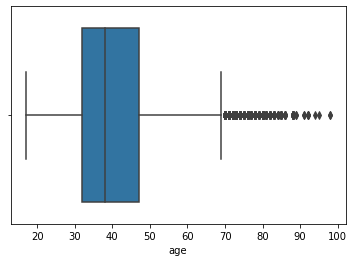

In [194]:
sns.boxplot(df_f1["age"])

Finding any outliers using z method

In [195]:
mu=df_f1["age"].mean()
var=df_f1["age"].var()
sigma=np.sqrt(var)
upper_bound=mu+ 3*sigma
lower_bound=mu- 3*sigma
df_f1[(df_f1['age']>upper_bound)| (df_f1['age']<lower_bound)]

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
24996,24997,76,retired,married,university.degree,no,no,yes,2,S10,...,999,0,nonexistent,no,-1.8,92.843,-50.0,1.757,5099.1,19134
25016,25017,73,retired,married,university.degree,no,yes,no,1,S11,...,999,1,failure,no,-1.8,92.843,-50.0,1.687,5099.1,60653
25034,25035,88,retired,divorced,basic.4y,no,yes,no,4,S2,...,999,0,nonexistent,no,-1.8,92.843,-50.0,1.663,5099.1,90036
25036,25037,88,retired,divorced,basic.4y,no,no,no,1,S11,...,999,0,nonexistent,yes,-1.8,92.843,-50.0,1.663,5099.1,60610
25038,25039,88,retired,divorced,basic.4y,no,yes,yes,4,S5,...,999,0,nonexistent,yes,-1.8,92.843,-50.0,1.663,5099.1,98198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36904,36905,84,retired,divorced,basic.4y,unknown,yes,yes,3,S20,...,3,1,success,no,-1.1,94.601,-49.5,1.000,4963.6,36830
36911,36912,81,retired,married,basic.4y,no,yes,no,4,S2,...,999,2,failure,yes,-1.1,94.601,-49.5,1.016,4963.6,94109
36919,36920,80,retired,married,professional.course,no,yes,no,1,S6,...,999,1,failure,yes,-1.1,94.601,-49.5,1.025,4963.6,79907
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009


In [198]:
df_f1["education"].value_counts()

university.degree      10971
high.school             8542
basic.9y                5421
professional.course     4746
basic.4y                3765
basic.6y                2074
unknown                 1549
illiterate                16
Name: education, dtype: int64

In [199]:
df_f1["education"].describe()

count                 37084
unique                    8
top       university.degree
freq                  10971
Name: education, dtype: object

## 2. Statistical Hypothesis Testing

### Z-Test

Taking 20% sample from the dataset

H0(Null Hypothesis): Population age mean is the same as the sample age mean.

H1(Alternate Hypothesis): Population age mean is not same as the sample age mean

In [29]:
s1=cust_and_bank_det.sample(frac=0.2)

In [35]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(s1['age'],value=cust_and_bank_det["age"].mean())
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


0.736665553531643
accept null hypothesis


INFERENCE: Null hypothesis holds true and therefore population age mean is same as the sample age mean.

### Chi-Square Test

H0 = There is no relation between Marital Status  and the Education Status.

H1 = There is a significant relationship between Marital Status and the Education Status. 

In [37]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
contingency= pd.crosstab(df_f1['education'], df_f1['marital'])
contingency

marital,divorced,married,single,unknown
education,,,,
basic.4y,430,2918,412,5
basic.6y,164,1594,311,5
basic.9y,497,3728,1189,7
high.school,1069,4659,2803,11
illiterate,1,14,1,0
professional.course,600,2853,1287,6
university.degree,1198,5775,3969,29
unknown,167,938,435,9


In [42]:
stat, p, dof, expected= chi2_contingency(contingency)
print(p, dof)

1.20180058372557e-305 21


In [40]:
if p<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

Reject Null Hypothesis


In [41]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
contingency= pd.crosstab(df_f1['education'], df_f1['marital'])
stat, p, dof, expected = chi2_contingency(contingency)
print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=21
probability=0.950, critical=32.671, stat=1502.162
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


INFERENCE: The above hypothesis test indicates that the null hypothesis has been rejected, implying that there is a significant correlation between marital status and education.